# E-commerce Dataset

## import libraries and load data

In [58]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_excel('Customer_dataset.xlsx')

In [60]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [62]:
df.shape

(30000, 38)

In [63]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [64]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [65]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Tommy Hilfiger'>

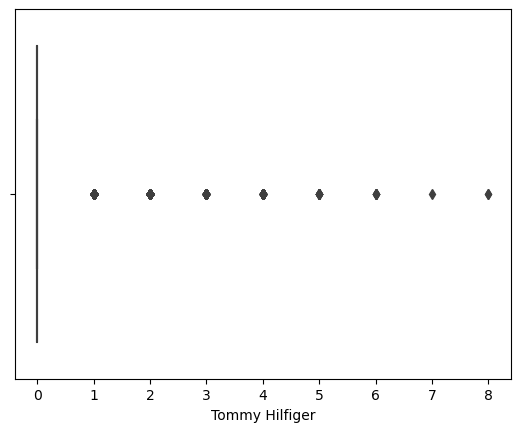

In [66]:
sns.boxplot(x='Tommy Hilfiger',data=df)

In [70]:
df.head(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [77]:
data = df[df.columns[~(df.columns == 'Gender')]]

In [81]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [82]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [28]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [83]:
# Creating an object for the StandardScaler function
X=StandardScaler()

In [84]:
scaled_data=pd.DataFrame(X.fit_transform(data.iloc[:,1:37]),columns=data.columns[1:])

In [85]:
scaled_data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.788301,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.161423,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,0.788301,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.161423,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,1.623898,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [86]:
k_means=KMeans(n_clusters=2,random_state=1)

In [89]:
k_means

KMeans(n_clusters=2, random_state=1)

In [90]:
k_means.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [91]:
k_means.inertia_

1028523.37946329

In [93]:
k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_data)
k_means.inertia_

1001150.2420541676

In [94]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_data)
k_means.inertia_

976376.128926379

In [95]:
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(scaled_data)
    wss.append(km.inertia_)

In [96]:
wss

[1080000.0000000007,
 1028523.37946329,
 1001150.2420541676,
 976376.128926379,
 952275.7671787092,
 933534.9921197383,
 911966.081969138,
 899044.0480813823,
 878598.3033546094,
 860034.3784992937]

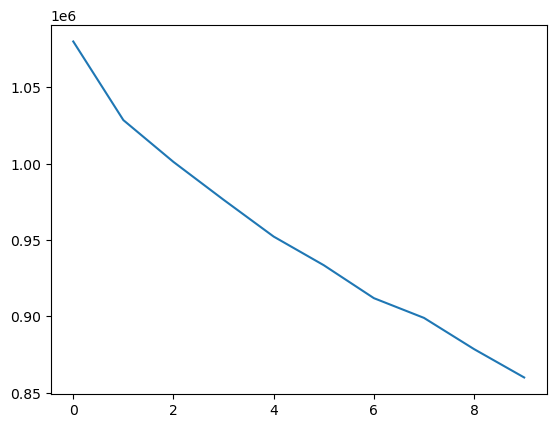

In [97]:
plt.plot(wss)

<AxesSubplot:>

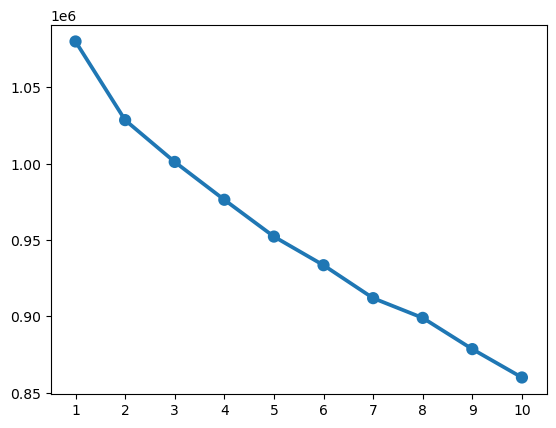

In [98]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss)

In [99]:
k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_data)
labels=k_means.labels_

In [100]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [101]:
sil_score=silhouette_score(scaled_data,labels,random_state=1)
sil_score

0.27585318187415636

In [108]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_data)
labels=k_means.labels_

In [109]:
sil_score=silhouette_score(scaled_data,labels,random_state=1)
sil_score

0.27563650454445304

In [105]:
data['kmeans_clus_4']=labels

In [110]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,kmeans_clus_4
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,3


In [111]:
data['kmeans_clus_4'].value_counts().sort_index()

0     5299
1      701
2    22737
3     1263
Name: kmeans_clus_4, dtype: int64

In [114]:
clust_pro=data.iloc[:,1:40].groupby('kmeans_clus_4').mean()
clust_pro['Freq']=data['kmeans_clus_4'].value_counts().sort_index()

In [115]:
clust_pro

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Freq
kmeans_clus_4,,,,,,,,,,,,,,,,,,,,,
0,4.637667,0.748254,0.665409,0.536705,0.514814,0.473486,0.307605,0.330817,0.275901,0.160785,...,0.662578,0.946782,0.332327,0.294773,0.215324,0.193999,0.158898,0.078505,0.035667,5299
1,4.398003,0.174037,0.258203,0.121255,0.111270,0.088445,0.146933,0.047076,0.042796,0.098431,...,0.181170,0.313837,0.139800,0.012839,0.008559,0.171184,0.121255,0.052782,0.032810,701
2,4.055636,0.138321,0.137969,0.141268,0.074020,0.064608,0.093108,0.047676,0.063729,0.075824,...,0.157585,0.225052,0.086467,0.021199,0.014822,0.143027,0.086291,0.056604,0.039099,22737
3,4.135392,0.626287,0.574822,0.433096,0.277910,0.210610,0.271576,0.267617,0.318290,0.144893,...,0.722882,0.592241,0.747427,0.219319,0.186857,1.081552,0.476643,0.713381,0.812352,1263
